In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from math import pi

from matplotlib import animation, rc
from IPython.display import HTML

In [27]:
def random_data(xs):
    noise = np.random.rand(len(xs)) * 0.2 - 0.1
    values = np.sin(xs * 2 * pi)
    return values + noise 

def draw(theta, xs, iteration):
    ys = []
    for x in xs:
        ys.append(hyp(theta, x))
    plt.plot(xs, ys, color=(0.6, 0.8 * iteration, 0.6))
    
def cost(theta, xs, ys):
    total_error = 0
    for i, x in enumerate(xs):
        total_error += (ys[i] - hyp(theta, x)) ** 2
    return total_error / 2

def hyp(theta, x, polynomial=True):
    summed = 0
    for i, t in enumerate(theta):
        summed += t * (x ** i) if polynomial else t * x
    return summed
    

In [28]:
alpha = 0.5
length = 100
xs = np.linspace(0, 1, length)
ys = random_data(xs)

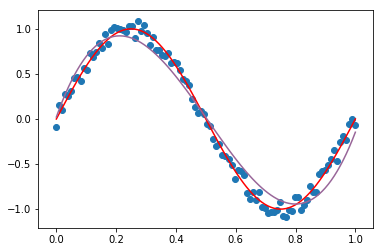

In [36]:
plt.scatter(xs, ys)
plt.plot(xs, np.sin(xs * 2 * pi), color="red")

theta = np.random.rand(4)
iterations = 5000
for iteration in range(iterations):
    for i, x in enumerate(xs):
        new_theta = np.copy(theta)
        for j in range(len(theta)):
            new_theta[j] = theta[j] + (alpha * (ys[i] - hyp(theta, x)) * (x ** j))
        theta = new_theta
    #if iteration % int(iterations/10) == 0:
    #    draw(theta, xs, iteration/iterations)
        
draw(theta, xs, 0.5)

## Names
Rafael Epplee & Hans Ole Hatzel

## Alpha Value
Choosing different alpha values can speed up the learning process in that fewer iterations are required to get a reasonable approximation. But large alpha values can also lead to the resulting function being a worse estimation as the step size is to large to get close to the correct function.

* 0.005 only produce good results for large numbers of iterations ~10.000
* 0.05 produced good approximations faster
* 0.5 still yields a decent aproximation in just 5.000 iterations
* 0.8 produces bad results regardless of the number of iteartions

A reasonable alpha value would be 0.5.